# Day 9: Multiple Linear Regression 📊

In this notebook, we’ll explore **Multiple Linear Regression (MLR)**, which is an extension of **Simple Linear Regression**.

## 1. Introduction  

- **Simple Linear Regression (SLR):** Uses **one independent variable (X)** to predict a dependent variable (Y).  
- **Multiple Linear Regression (MLR):** Uses **two or more independent variables (X1, X2, ... Xn)** to predict the dependent variable (Y).  

**Equation:**
\[
Y = b_0 + b_1X_1 + b_2X_2 + \dots + b_nX_n + \epsilon
\]

Where:  
- \(Y\) = dependent variable  
- \(X_1, X_2, ..., X_n\) = independent variables  
- \(b_0\) = intercept  
- \(b_1, b_2, ...\) = regression coefficients  
- \(\epsilon\) = error term  

## 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

3. Load Dataset

We’ll use a dummy dataset (student performance dataset).

In [2]:
# Sample dataset: Hours of Study, Hours of Sleep, Score
data = {
    'Hours_Study': [2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7],
    'Hours_Sleep': [8, 7, 6, 5, 7, 9, 4, 6, 5, 8],
    'Score': [21, 47, 27, 75, 30, 20, 88, 60, 81, 25]
}
df = pd.DataFrame(data)
df

,Hours_Study,Hours_Sleep,Score
0,2.5,8,21
1,5.1,7,47
2,3.2,6,27
3,8.5,5,75
4,3.5,7,30
5,1.5,9,20
6,9.2,4,88
7,5.5,6,60
8,8.3,5,81
9,2.7,8,25


4. Exploratory Data Analysis (EDA)

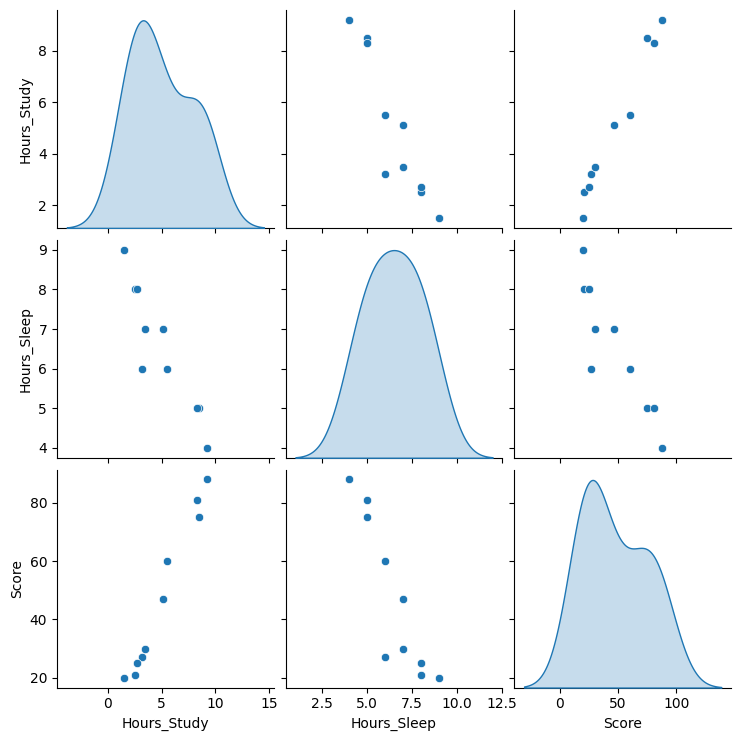

             Hours_Study  Hours_Sleep     Score
Hours_Study     1.000000    -0.922647  0.987157
Hours_Sleep    -0.922647     1.000000 -0.898340
Score           0.987157    -0.898340  1.000000


In [3]:
sns.pairplot(df, diag_kind='kde')
plt.show()

print(df.corr())

5. Define Features and Target

In [4]:
X = df[['Hours_Study', 'Hours_Sleep']]   # Independent variables
y = df['Score']                           # Dependent variable

6. Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

7. Train Model

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Coefficients & Intercept:

In [7]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -13.40717104773249
Coefficients: [10.0936034   1.58172612]


8. Predictions

In [8]:
y_pred = model.predict(X_test)

print("Actual:", y_test.values)
print("Predicted:", y_pred)

Actual: [81 47]
Predicted: [78.27836771 49.14228908]


9. Model Evaluation

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 5.99834239876204
R² Score: 0.9792444899696815


10. Example Prediction

Predict score for a student who studies 7 hours and sleeps 6 hours:

In [11]:
new_data = pd.DataFrame({
    'Hours_Study': [7.0],
    'Hours_Sleep': [6.0]
})
predicted_score = model.predict(new_data)
print("Predicted Score:", predicted_score[0])

Predicted Score: 66.73840941246559


11. Conclusion

Multiple Linear Regression helps to model the relationship between multiple features and a target variable.

Model performance can be evaluated using R² Score and MSE.

More features ≠ better model → Sometimes extra features add noise.